In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
path = r"D:\IdeaC\GreyAtoms\Python\Data\Olympics_Cleaned.csv"

In [5]:
data = pd.read_csv(path)
data.head()

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [6]:
data.rename(columns={'Total':'Total_Medals'}, inplace=True)
data.head(10)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
6,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
7,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
8,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
9,Bahrain,8,0,0,1,1,0,0,0,0,0,8,0,0,1,1


In [14]:
data['Better_Event'] = np.where(data['Total_Summer']==data['Total_Winter'], 'Both', np.where(data['Total_Summer']>data['Total_Winter'], 'Summer', 'Winter'))
better_event = data['Better_Event'].value_counts().idxmax()
better_event

'Summer'

In [28]:
top_countries = data[['Country_Name', 'Total_Summer', 'Total_Winter', 'Total_Medals']]
top_countries = top_countries.iloc[0:-1]

['United States',
 'Soviet Union',
 'Great Britain',
 'France',
 'Germany',
 'Italy',
 'Sweden',
 'Hungary',
 'China',
 'Australia']

In [29]:
def top_ten(top_countries, column_name):
    country_list = list(top_countries.nlargest(10, column_name)['Country_Name'])
    return country_list

In [42]:
top_10_summer = top_ten(top_countries, 'Total_Summer')
top_10_winter = top_ten(top_countries, 'Total_Winter')
top_10 = top_ten(top_countries, 'Total_Medals')

common = list(set(top_10_summer) & set(top_10_winter) & set(top_10))
common

['Soviet Union', 'Germany', 'Sweden', 'United States']

In [48]:
summer_df = data[data['Country_Name'].isin(top_10_summer)]
winter_df = data[data['Country_Name'].isin(top_10_winter)]
top_df = data[data['Country_Name'].isin(top_10)]

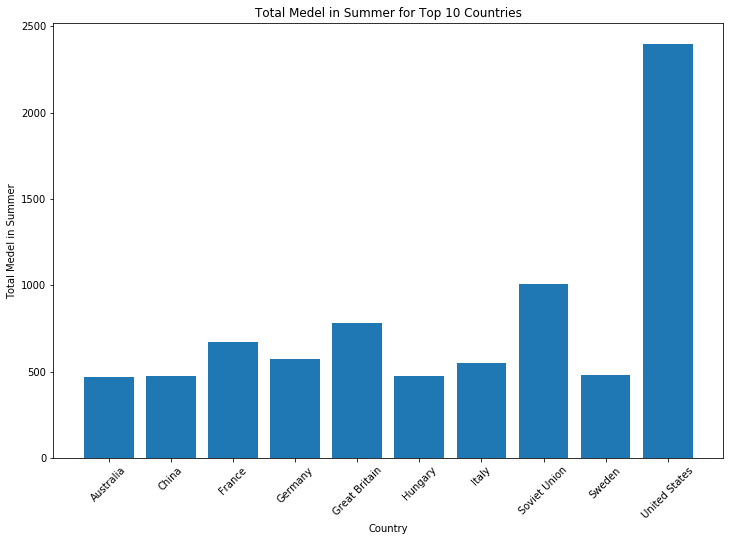

In [57]:
plt.figure(figsize=[12,8])
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Medel in Summer')
plt.title('Total Medel in Summer for Top 10 Countries')
plt.bar(summer_df['Country_Name'], summer_df['Total_Summer'])
plt.show()

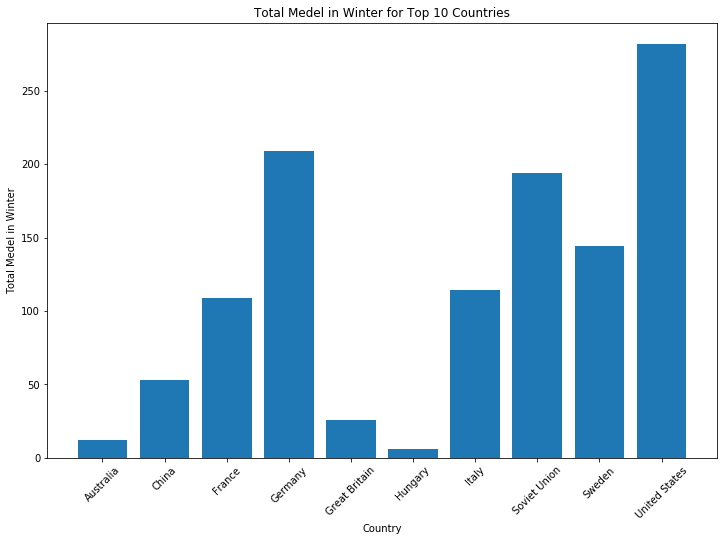

In [58]:
plt.figure(figsize=[12,8])
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Medel in Winter')
plt.title('Total Medel in Winter for Top 10 Countries')
plt.bar(summer_df['Country_Name'], summer_df['Total_Winter'])
plt.show()

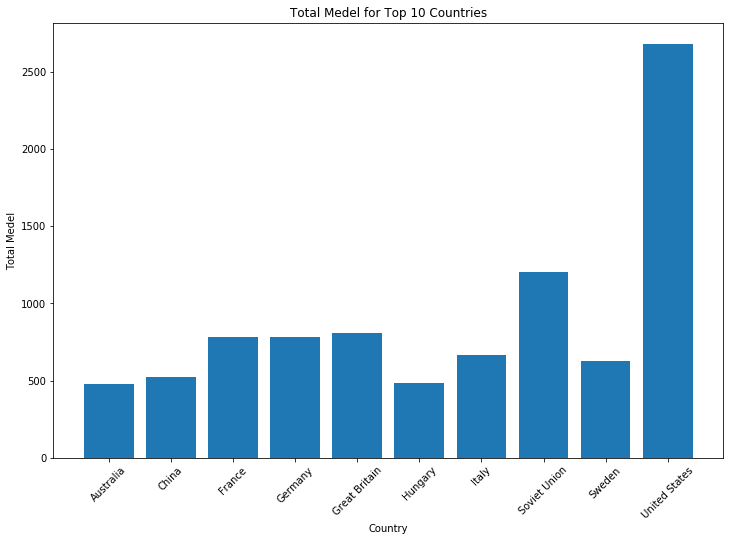

In [60]:
plt.figure(figsize=[12,8])
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Medel')
plt.title('Total Medel for Top 10 Countries')
plt.bar(summer_df['Country_Name'], summer_df['Total_Medals'])
plt.show()

In [90]:
summer_df['Golden_Ratio'] = summer_df['Gold_Summer']/summer_df['Total_Summer']
summer_max_ratio = summer_df.loc[summer_df['Golden_Ratio'].idxmax(), 'Golden_Ratio']
summer_country_gold = summer_df.loc[summer_df['Golden_Ratio'].idxmax(), 'Country_Name']
summer_country_gold

'China'

In [91]:
winter_df['Golden_Ratio'] = winter_df['Gold_Winter']/winter_df['Total_Winter']
winter_max_ratio = winter_df.loc[winter_df['Golden_Ratio'].idxmax(), 'Golden_Ratio']
winter_country_gold = winter_df.loc[winter_df['Golden_Ratio'].idxmax(), 'Country_Name']
winter_country_gold

'Soviet Union'

In [92]:
top_df['Golden_Ratio'] = top_df['Gold_Total']/top_df['Total_Medals']
top_max_ratio = top_df.loc[top_df['Golden_Ratio'].idxmax(), 'Golden_Ratio']
top_country_gold = top_df.loc[top_df['Golden_Ratio'].idxmax(), 'Country_Name']
top_country_gold

'China'

In [94]:
data_1 = data.iloc[:-1]
data_1['Total_Points'] = data_1['Gold_Total']*3+data_1['Silver_Total']*2+data_1['Bronze_Total']
most_points = data_1.loc[data_1['Total_Points'].idxmax(), 'Total_Points']
best_country = data_1.loc[data_1['Total_Points'].idxmax(), 'Country_Name']
best_country

'United States'

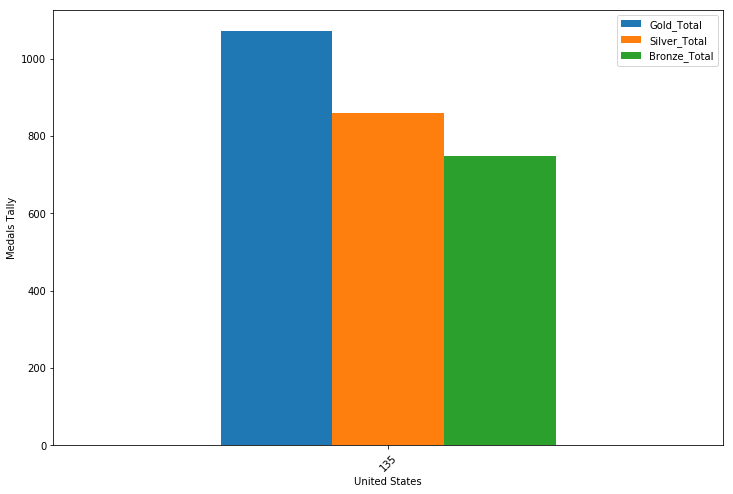

In [115]:
best = data[data['Country_Name']==best_country][['Gold_Total', 'Silver_Total', 'Bronze_Total']]
best.plot(kind='bar', stacked=False, figsize=[12,8])
plt.xlabel(best_country)
plt.ylabel('Medals Tally')
plt.xticks(rotation=45)
plt.show()

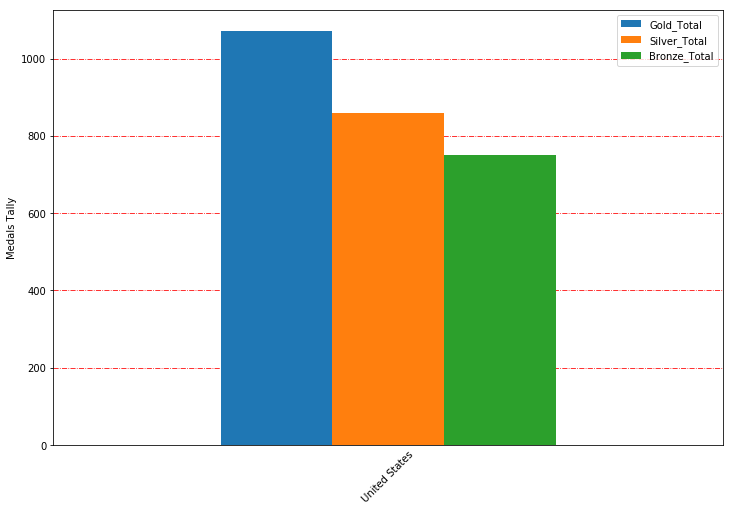

In [173]:
best = data[data['Country_Name']==best_country][['Country_Name', 'Gold_Total', 'Silver_Total', 'Bronze_Total']]
best.set_index('Country_Name', inplace=True)
best.plot(kind='bar', stacked=False, figsize=[12,8], zorder=3)
plt.ylabel('Medals Tally')
plt.xlabel(best_country, rotation=45)
plt.xticks(rotation=45)
plt.xticks([])
plt.grid(True, color='red', linestyle='-.', zorder=0)
plt.show()